### Oasis Infobyte Internship Task 1
### Iris Flowers Classification

#### About the Data
In this Project, I am using Iris Flower Dataset from the kaggle. This Dataset contains features of different flower species. Independent features in this dataset are Sepal Length, Sepal Width, Petal Length, and Petal Width. All these lengths were in centimeters. And Dependent feature, which will be the output for the model, is Species. It contains the name of the species to which that particular flower with those measurements belongs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data Profiling

In [3]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Data Cleaning

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# Dropping Unnecessary Columns
df.drop('Id',axis=1,inplace=True)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Data Visualization

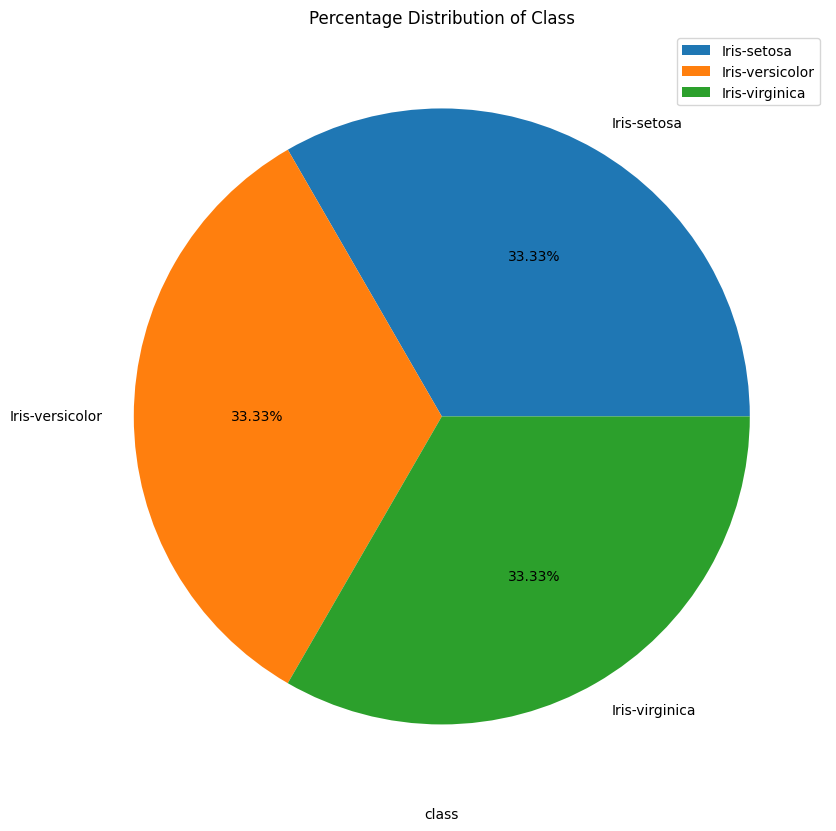

In [15]:
# Finding Percentage Distribution of Class
plt.figure(figsize=(20,10))
df['Species'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Percentage Distribution of Class')
plt.legend(df['Species'].value_counts().index)
plt.xlabel('class')
plt.ylabel(None)
plt.show()

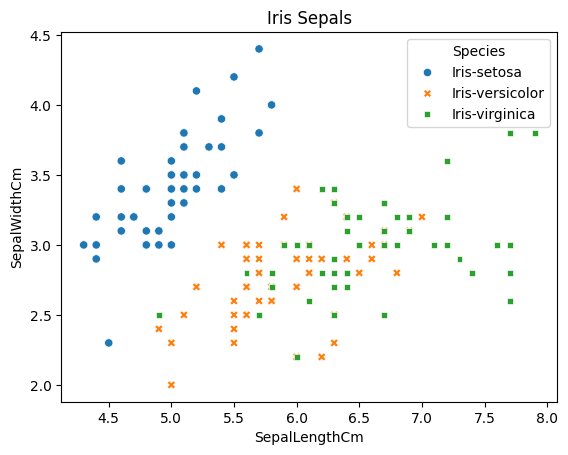

In [16]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='Species')
plt.title('Iris Sepals')
plt.show()

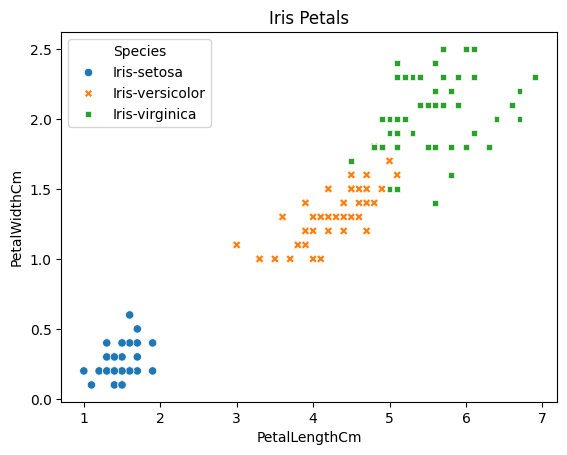

In [17]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', style='Species')
plt.title('Iris Petals')
plt.show()

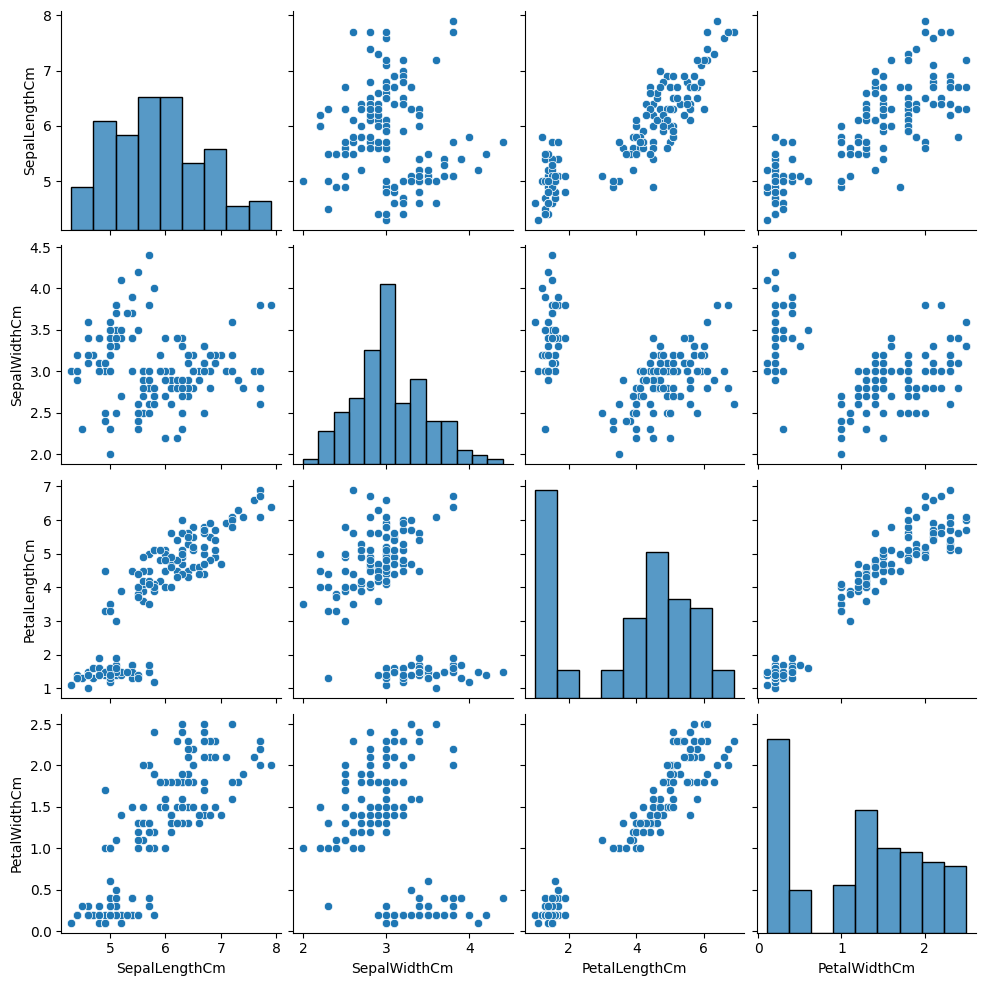

In [18]:
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

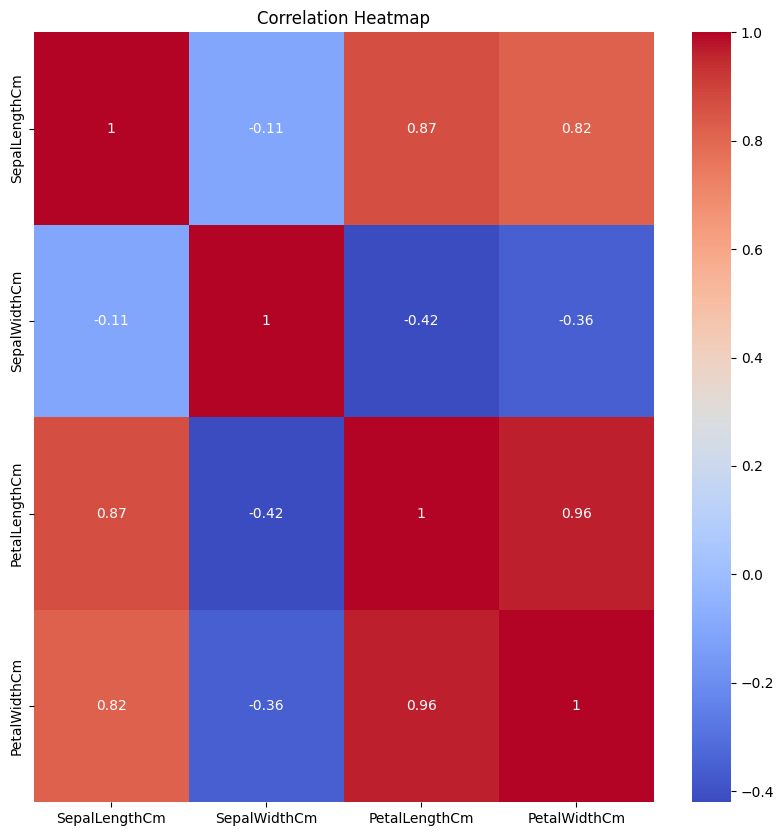

In [19]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Data encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#### Data Modelling

In [22]:
x = df.drop(['Species'],axis=1)
y = df['Species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [23]:
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [24]:
y.head(3)

0    0
1    0
2    0
Name: Species, dtype: int32

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

#### Logistic Regression

In [27]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2 2 1 0 2 1 0 0
 0]


In [29]:
# Computing Training and Testing score
print('Training Score',lr.score(x_train,y_train))  # Training Accuracy
print('Testing Score',lr.score(x_test,y_test))    # Testing Accuracy

Training Score 0.9910714285714286
Testing Score 0.8947368421052632


In [30]:
cm = confusion_matrix(y_test,ypred_lr)
print(cm)
print('Accuracy Score',accuracy_score(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr,zero_division=0))

[[11  0  0]
 [ 0 12  2]
 [ 0  2 11]]
Accuracy Score 0.8947368421052632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.86      0.86        14
           2       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38



#### knn Classifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 1 2 2 0 0 1 2 1 1 2 1 1 1 2 2 2 1 0 2 1 0 0
 0]


In [33]:
print('Training Score',knn.score(x_train,y_train))  # Training Accuracy
print('Testing Score',knn.score(x_test,y_test))    # Testing Accuracy

Training Score 0.9821428571428571
Testing Score 0.8947368421052632


In [34]:
cm = confusion_matrix(y_test,ypred_knn)
print(cm)
print('Accuracy Score',accuracy_score(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn,zero_division=0))

[[11  0  0]
 [ 0 13  1]
 [ 0  3 10]]
Accuracy Score 0.8947368421052632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      0.93      0.87        14
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.91      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



#### DecisionTree Classifier

In [35]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [36]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2 2 1 0 2 1 0 0
 0]


In [37]:
print('Training Score',dt.score(x_train,y_train))  # Training Accuracy
print('Testing Score',dt.score(x_test,y_test))    # Testing Accuracy

Training Score 1.0
Testing Score 0.9210526315789473


In [38]:
cm = confusion_matrix(y_test,ypred_dt)
print(cm)
print('Accuracy Score',accuracy_score(y_test,ypred_dt))
print(classification_report(y_test,ypred_dt,zero_division=0))

[[11  0  0]
 [ 0 12  2]
 [ 0  1 12]]
Accuracy Score 0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.86      0.89        14
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38



#### RandomForest Classifier

In [39]:
rfc=RandomForestClassifier(n_estimators=80)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80)

In [40]:
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2 2 1 0 2 1 0 0
 0]


In [41]:
print('Training Score',rfc.score(x_train,y_train))  # Training Accuracy
print('Testing Score',rfc.score(x_test,y_test))    # Testing Accuracy

Training Score 1.0
Testing Score 0.8947368421052632


In [42]:
cm = confusion_matrix(y_test,ypred_rfc)
print(cm)
print('Accuracy Score',accuracy_score(y_test,ypred_rfc))
print(classification_report(y_test,ypred_rfc,zero_division=0))

[[11  0  0]
 [ 0 12  2]
 [ 0  2 11]]
Accuracy Score 0.8947368421052632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.86      0.86        14
           2       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.89      0.89      0.89        38



#### Report of Model

In [43]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Knn Clasifier', 'DecisionTree Classifier','RandomForest Classifier'],
    'Score': [accuracy_score(y_test,ypred_lr),accuracy_score(y_test,ypred_knn),accuracy_score(y_test,ypred_dt),accuracy_score(y_test,ypred_rfc)]})
results

,Model,Score
0,Logistic Regression,0.894737
1,Knn Clasifier,0.894737
2,DecisionTree Classifier,0.921053
3,RandomForest Classifier,0.894737
